# Importing required libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
from PIL import Image
from keras import models
import matplotlib.pyplot as plt
import cv2
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization

In [2]:
IMG_width = 178
IMG_height = 218

In [4]:
batch_size = 512

# ImageDataGenerator with Data Augmentation

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
#                                    horizontal_flip = True,
#                                   width_shift_range=0.3,
#                                   height_shift_range=0.3,
#                                   zoom_range=0.3,
#                                   brightness_range=[0.1, 1.5],
#                                   rotation_range=15
                                  )

train_gen = train_datagen.flow_from_directory('./Dataset/Train', 
                                             target_size = (IMG_height, IMG_width),
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 160000 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory('./Dataset/Test', 
                                             target_size = (IMG_height, IMG_width),
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 20001 images belonging to 2 classes.


In [7]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_gen = val_datagen.flow_from_directory('./Dataset/Validation', 
                                             target_size = (IMG_height, IMG_width),
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 22598 images belonging to 2 classes.


# Visualizing few random male images

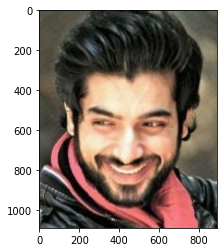

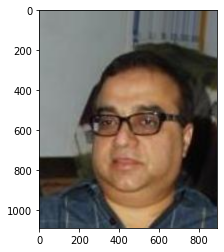

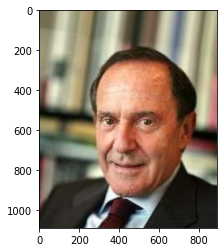

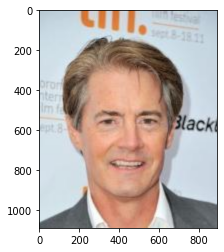

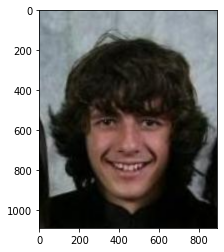

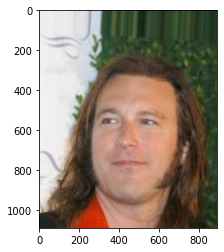

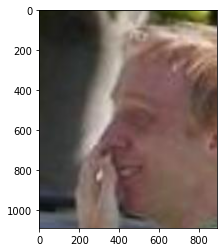

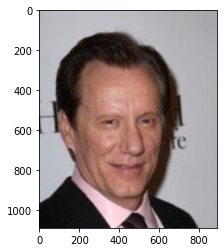

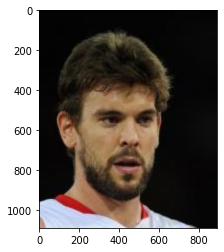

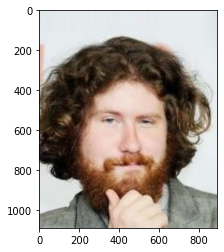

In [7]:
img_folder = os.listdir('./Dataset/Validation/Male')
rows, cols = 2, 5
for n in range(0, 10):
    image = cv2.imread(os.path.join('./Dataset/Validation/Male', img_folder[random.randint(0, len(img_folder))]), cv2.IMREAD_COLOR)
    image = image[...,::-1]
    image = cv2.resize(image, (5*IMG_width, 5*IMG_height))
    plt.imshow(image)
    plt.show()

# Visualizing few random female images

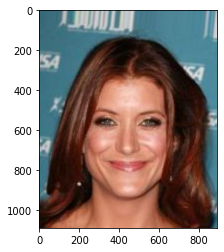

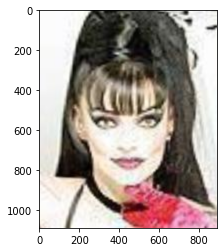

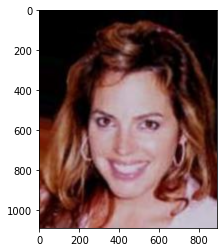

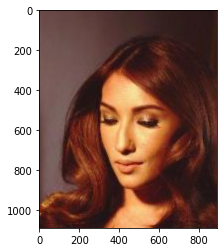

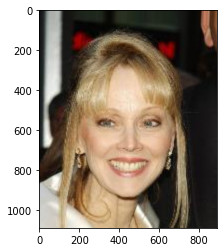

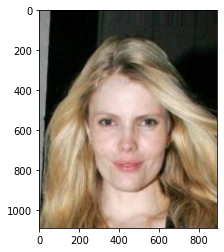

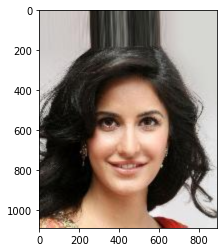

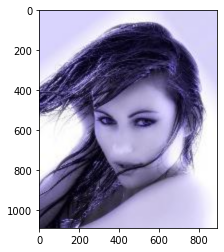

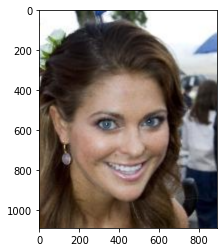

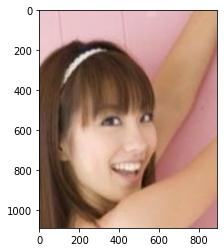

In [13]:
img_folder = os.listdir('./Dataset/Validation/Female')
rows, cols = 2, 5
for n in range(0, 10):
    image = cv2.imread(os.path.join('./Dataset/Validation/Female', img_folder[random.randint(0, len(img_folder))]), cv2.IMREAD_COLOR)
    image = image[...,::-1]
    image = cv2.resize(image, (5*IMG_width, 5*IMG_height))
    plt.imshow(image)
    plt.show()

# CNN model 

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_width, IMG_height, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.BatchNormalization())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))

2022-06-27 15:18:51.972719: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-27 15:18:53.756871: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7828 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:18:00.0, compute capability: 7.5
2022-06-27 15:18:53.757688: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9645 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:3b:00.0, compute capability: 7.5
2022-06-27 15:18:53.758347: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/repli

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 216, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 108, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 86, 106, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 51, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 25, 128)      0

# Model compiling and checkpoints

In [10]:
model.compile(optimizer= 'Adam',
              loss = 'binary_crossentropy',
              metrics= 'binary_accuracy')

In [11]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./gender_model.weihgts.h5', 
                                             save_best_only = True,
                                             monitor= 'val_binary_accuracy',
                                             mode = 'max')

# Model fitting

In [12]:
with tf.device('/GPU:1'):
    history  = model.fit(train_gen,
                         validation_data=val_gen,
                        steps_per_epoch=len(train_gen.filenames)//batch_size,
                         validation_steps= len(val_gen.filenames)//batch_size,
                        epochs=10)

Epoch 1/10


2022-06-27 15:19:27.791169: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-06-27 15:19:28.624991: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.194, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-06-27 15:19:29.080829: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_1_bfc) ran out of memory trying to allocate 3.93GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-06-27 15:19:29.080881: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_1_bfc) ran out of memory trying to allocate 3.93GiB with freed_by_count=0. The caller indicates that this is not a failure, but this

312/312 [==============================] - 287s 904ms/step - loss: 0.1997 - binary_accuracy: 0.9172 - val_loss: 0.2225 - val_binary_accuracy: 0.9003
Epoch 2/10
312/312 [==============================] - 281s 901ms/step - loss: 0.0936 - binary_accuracy: 0.9660 - val_loss: 0.0804 - val_binary_accuracy: 0.9714
Epoch 3/10
312/312 [==============================] - 288s 922ms/step - loss: 0.0767 - binary_accuracy: 0.9720 - val_loss: 0.0779 - val_binary_accuracy: 0.9722
Epoch 4/10
312/312 [==============================] - 288s 921ms/step - loss: 0.0655 - binary_accuracy: 0.9763 - val_loss: 0.0741 - val_binary_accuracy: 0.9732
Epoch 5/10
312/312 [==============================] - 289s 927ms/step - loss: 0.0590 - binary_accuracy: 0.9790 - val_loss: 0.0975 - val_binary_accuracy: 0.9654
Epoch 6/10
312/312 [==============================] - 286s 915ms/step - loss: 0.0528 - binary_accuracy: 0.9810 - val_loss: 0.0718 - val_binary_accuracy: 0.9740
Epoch 7/10
312/312 [==============================]

# Plotting charts

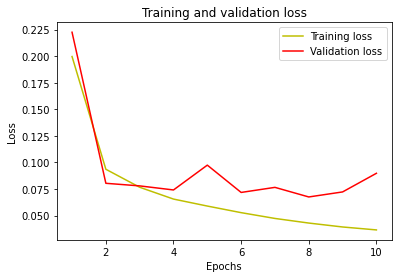

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

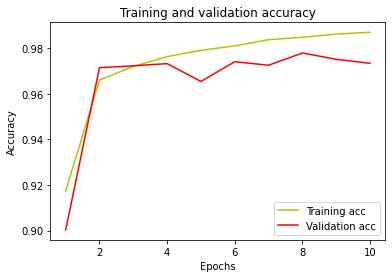

In [14]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Testing model with test data

In [16]:
test_loss, test_acc = model.evaluate(test_gen)
print('test acc:', test_acc)
print('test_loss:',test_loss)

40/40 [==============================] - 32s 786ms/step - loss: 0.0741 - binary_accuracy: 0.9752
test acc: 0.9751512408256531
test_loss: 0.07411941140890121


# Random images vs model predictions

1/1 [==============================] - 0s 176ms/step
Prediction: Male


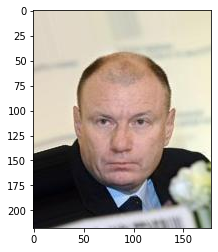

In [19]:
test_folderM = os.listdir('./Dataset/Validation/Male')
img_path = os.path.join('./Dataset/Validation/Male/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 29ms/step
Prediction: Male


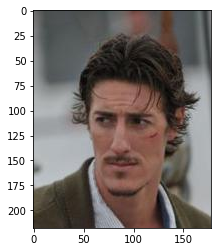

In [20]:
test_folderM = os.listdir('./Dataset/Validation/Male')
img_path = os.path.join('./Dataset/Validation/Male/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 24ms/step
Prediction: Male


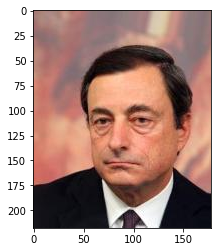

In [21]:
test_folderM = os.listdir('./Dataset/Validation/Male')
img_path = os.path.join('./Dataset/Validation/Male/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 31ms/step
Prediction: Male


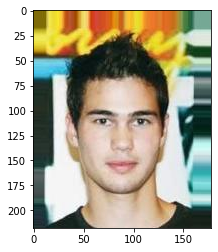

In [22]:
test_folderM = os.listdir('./Dataset/Validation/Male')
img_path = os.path.join('./Dataset/Validation/Male/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 23ms/step
Prediction: Male


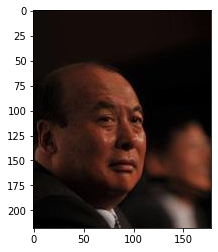

In [23]:
test_folderM = os.listdir('./Dataset/Validation/Male')
img_path = os.path.join('./Dataset/Validation/Male/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 22ms/step
Prediction: Male


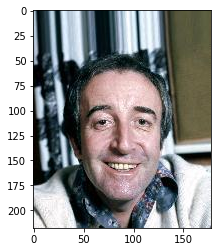

In [24]:
test_folderM = os.listdir('./Dataset/Validation/Male')
img_path = os.path.join('./Dataset/Validation/Male/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 28ms/step
Prediction: Male


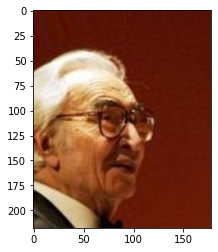

In [25]:
test_folderM = os.listdir('./Dataset/Validation/Male')
img_path = os.path.join('./Dataset/Validation/Male/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 28ms/step
Prediction: Female


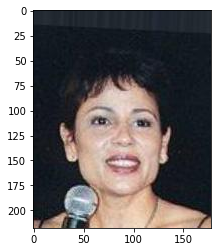

In [26]:
test_folderM = os.listdir('./Dataset/Validation/Female')
img_path = os.path.join('./Dataset/Validation/Female/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 28ms/step
Prediction: Female


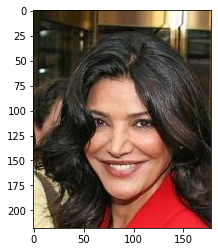

In [30]:
test_folderM = os.listdir('./Dataset/Validation/Female')
img_path = os.path.join('./Dataset/Validation/Female/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 21ms/step
Prediction: Female


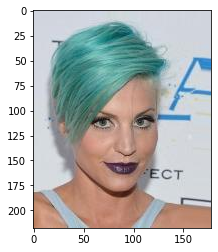

In [31]:
test_folderM = os.listdir('./Dataset/Validation/Female')
img_path = os.path.join('./Dataset/Validation/Female/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 21ms/step
Prediction: Female


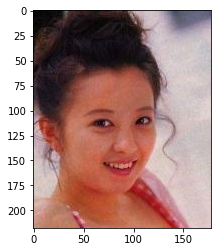

In [32]:
test_folderM = os.listdir('./Dataset/Validation/Female')
img_path = os.path.join('./Dataset/Validation/Female/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 21ms/step
Prediction: Female


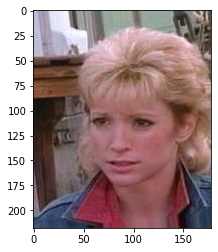

In [33]:
test_folderM = os.listdir('./Dataset/Validation/Female')
img_path = os.path.join('./Dataset/Validation/Female/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 22ms/step
Prediction: Female


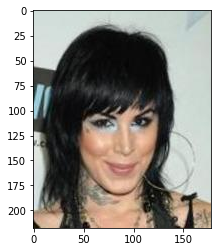

In [34]:
test_folderM = os.listdir('./Dataset/Validation/Female')
img_path = os.path.join('./Dataset/Validation/Female/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 21ms/step
Prediction: Female


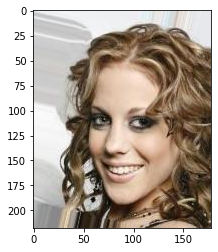

In [35]:
test_folderM = os.listdir('./Dataset/Validation/Female')
img_path = os.path.join('./Dataset/Validation/Female/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 26ms/step
Prediction: Female


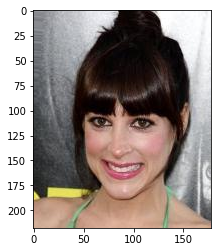

In [36]:
test_folderM = os.listdir('./Dataset/Validation/Female')
img_path = os.path.join('./Dataset/Validation/Female/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
# image = cv2.resize(image, (IMG_height, IMG_width))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))